# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

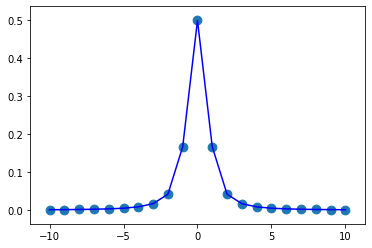

In [2]:
# Plotting function f(k)
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

dist = lambda k: 1/(abs(k) * (abs(k)+1) * (abs(k)+2)) if k else 0.5
# -10 is included but 11 is excluded
a = np.arange(-10, 11)
b = np.vectorize(dist)(a)

plt.plot(a, b, c='b')
plt.scatter(a, b, s=77)
plt.show()


In [3]:
# Writting function sampling from Y's distribution

import random
import math

def sampleValue():
    # P(k = 0) = 0.5
    # As the graph shows the symmetry for prob of k != 0
    # Then P(k > 0) = P(k < 0) = (1 - 0.5)/0.5
    # So lets simulate the prob using array and random function
    sim = {
        1: -1,
        2: 0,
        3: 0,
        4: 1
    }

    place = sim[random.randint(1, 4)]
    probSim = np.random.uniform() / 4
    cum_dist = 0
    k = 1

    while cum_dist <= probSim:
        # Invariant:
        cum_dist = cum_dist + 1/(k*(k+1)*(k+2))
        # k++
        k += 1

    return place * k

# N is 10.000, generating N values from described distribution
N = 10000
# Values array according to given distribution
# Calls sampleValue 10000 times
values = np.array([sampleValue() for i in range(N)])

# print(values)

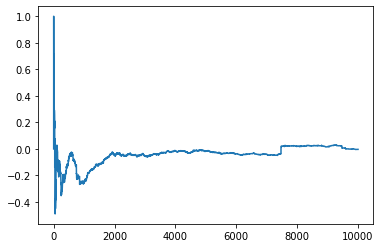

In [4]:
# Computing Y_i mean as shown in formula
a = np.arange(N)
mean = np.cumsum(values) / (a+1)
plt.plot(a, mean)
plt.show()
# From the plot it is obvious that the series converges.
# According to the strong law of the large numbers, the means should converge to the mean(EY) which is 0.

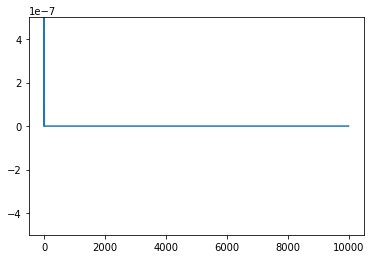

In [5]:
# Computting median
# a[:(i)] is slice notation which means items from start to i-1
# That is why we add 1 to get from start to i
median = [np.median(values[:(i+1)]) for i in a]
plt.plot(a, median)
# It is obvious that the Y-axis should range really close to 0.
# So, we can limit the Y-axis close to it.
plt.ylim([-0.0000005,0.0000005])
plt.show()

In [ ]:
Conclusion:
    The sample median converges faster to the mean than the sample mean converges to the actual mean.